# Individual Coursework

Analyse the individual coursework.

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re

df = pd.read_csv("./ind/data.csv")
not_checks = [
    "Unnamed: 0",
    "Submission filepath",
    "Score",
    "Maximum score",
    "Tags match",
    "Run time",
    "Mark",
    "Username",
]
df["Mark"] = np.ceil((df["Score"] / df["Maximum score"] * 100))
STUDENT_ID_PATTERN = re.compile("([a-z]\d+)")
df["Username"] = df["Submission filepath"].str.extract(
    STUDENT_ID_PATTERN
)

In [46]:
df[["Mark"]].describe()

,Mark
count,249.000000
mean,84.767068
std,18.338494
min,0.000000
25%,80.000000
50%,89.000000
75%,98.000000
max,100.000000


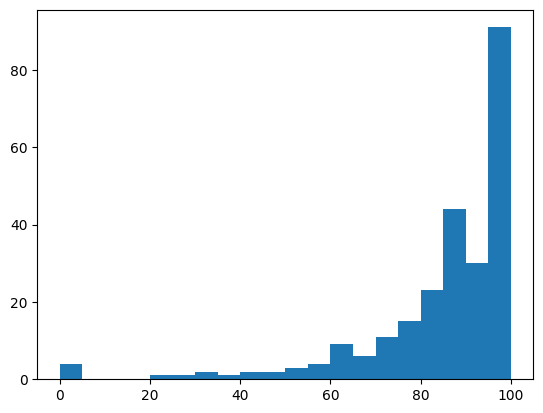

In [47]:
plt.figure()
plt.hist(df["Mark"], bins=20);

In [48]:
for column in df.columns:
    if column not in not_checks:
        percent_correct = np.mean(df[column]) * 100
        print(f"- {column}: {percent_correct:.2f} %") 

- 1a check answer is an equation: 96.80 %
- 1a check output uses dsolve: 98.40 %
- 1a check answer satisfies differential equation: 96.40 %
- 1b check answer is an equation: 96.80 %
- 1b check output uses dsolve: 98.40 %
- 1b check answer satisfies differential equation: 92.80 %
- 1c check answer is an equation: 96.40 %
- 1c check output uses dsolve: 97.20 %
- 1c check answer satisfies differential equation: 81.20 %
- 1d check answer is an equation: 98.00 %
- 1d check output uses dsolve: 98.00 %
- 1d check answer satisfies differential equation: 94.40 %
- 2a check general solution is a set: 70.00 %
- 2a check solution excludes 0: 72.00 %
- 2a number of solutions for the cubic must be three: 69.20 %
- 2b expected answer for equation: 91.60 %
- 3a check function has a docstring: 52.00 %
- 3a check function is not defined for correct range of numbers: 90.00 %
- 3a check specific values of function: 67.60 %
- 3b check correct value for n equals 5: 84.00 %
- 3c:exact value for p equals one 

4 Students failed:

In [92]:
df[df["Mark"] == 0]

,Unnamed: 0,Submission filepath,Score,Maximum score,Tags match,Run time,1a check answer is an equation,1a check output uses dsolve,1a check answer satisfies differential equation,1b check answer is an equation,...,4b correct value of number_of_rows,4b check correct type of output,4c check output is calculated using a for loop,4c make use of correlation calculation,4c value is correct to 6 decimal places,4c check answer is consistant with values of determinants and number_of_rows,4d make use of linear_regression,4d check answer is consistant with values of determinants and number_of_rows,Mark,Username
210,210,submissions/Individual Coursework_c23125321_at...,0.0,100.0,True,3.654478,False,False,False,False,...,False,False,False,False,False,False,False,False,0.0,c23125321
211,211,submissions/Individual Coursework_c23125321_at...,0.0,100.0,True,3.629036,False,False,False,False,...,False,False,False,False,False,False,False,False,0.0,c23125321
212,212,submissions/Individual Coursework_c23125321_at...,0.0,100.0,True,2.806527,False,False,False,False,...,False,False,False,False,False,False,False,False,0.0,c23125321
249,249,submissions/c23047123.ipynb,0.0,100.0,True,4.145354,False,False,False,False,...,False,False,False,False,False,False,False,False,0.0,c23047123


# Prep marks for upload

In [89]:
upload_df = pd.read_csv("/Users/smavak/Downloads/gc_2324-MA1003_columns_2023-12-22-12-28-22.csv")
upload_df = upload_df.merge(right=df, how="left", on="Username")[list(upload_df.columns)  + ["Mark"]]
coursework_column = [column for column in upload_df.columns if "Individual Coursework" in column][0]
upload_df[coursework_column] = upload_df["Mark"]
upload_df = upload_df[list(upload_df.columns)[:-1]]
upload_df = upload_df.fillna(0)
upload_df.describe()

,Student ID,Individual Coursework [Total Pts: 100 Score] |853106
count,2.720000e+02,272.000000
mean,2.287403e+07,77.599265
std,1.317929e+06,29.428337
min,2.023194e+06,0.000000
25%,2.302758e+07,74.000000
50%,2.304708e+07,88.000000
75%,2.312505e+07,97.000000
max,2.312573e+07,100.000000


In [90]:
upload_df.to_csv("./to_upload.csv", index=None)